# Helper utils and imports

In [1]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import transforms
import cv2

import json
with open('../../Datasets/ILSVRC2012/indices.json') as f:
    labels = json.load(f)
    
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
model_path = os.path.abspath(os.path.join('../models'))
if model_path not in sys.path:
    sys.path.append(model_path)

from data_load import ImageNet2012Dataset, RandomCrop, Rescale, ToTensor

def center_crop(image, new_h, new_w):
    h, w = image.shape[:2]
    top = (h - new_h) // 2
    left = (w - new_w) // 2
    image = image[top:top + new_h, left:left + new_w]
    return image

def to_tensor(image):
    image = image.transpose((2, 0, 1))
    image = torch.from_numpy(image)
    image = image.float()
    return image

def predict(net, img):
    with torch.no_grad():
        output = net(img)
        max_vals, max_indices = torch.topk(output, 5)
        max_indices = torch.squeeze(max_indices, 0)
        max_indices = max_indices.tolist()
        bests = [labels.get(str(i)) for i in max_indices]
        for best in bests:
            print(best)

# Load model and visualize the loss

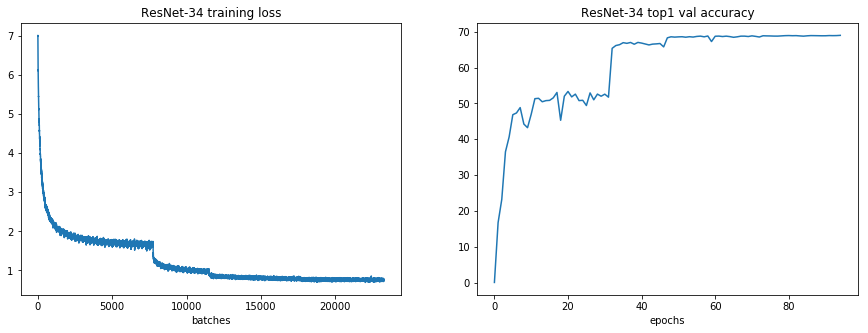

In [2]:
checkpoint = torch.load(
    '../saved_models/resnet34-pt-yanjiali-010319.pt', map_location='cpu')

from resnet34 import ResNet34
net = ResNet34()
net.load_state_dict(checkpoint['model'])
net.eval()

losses = [i/10 for i in checkpoint["loss_logger"]]
acc = checkpoint["acc_logger"]
batches = [i for i in range(1, len(losses) + 1)]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('ResNet-34 training loss')
plt.plot(batches, losses)
plt.xlabel('batches')
plt.subplot(122)
plt.title('ResNet-34 top1 val accuracy')
plt.xlabel('epochs')
plt.plot(acc)

def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = center_crop(img, 224, 224)
    plt.imshow(img)
    img = to_tensor(img)
    img = torch.unsqueeze(img, 0)
    return img

# Make some prediction

great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
tiger shark, Galeocerdo cuvieri
hammerhead, hammerhead shark
electric ray, crampfish, numbfish, torpedo
killer whale, killer, orca, grampus, sea wolf, Orcinus orca


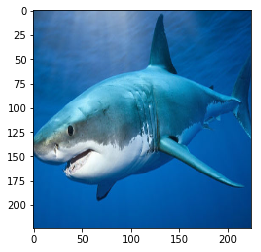

In [3]:
img1 = cv2.imread('../test_images/shark1.jpg')
img1 = preprocess(img1)
predict(net, img1)

diamondback, diamondback rattlesnake, Crotalus adamanteus
horned viper, cerastes, sand viper, horned asp, Cerastes cornutus
night snake, Hypsiglena torquata
sidewinder, horned rattlesnake, Crotalus cerastes
hognose snake, puff adder, sand viper


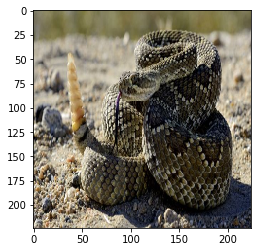

In [4]:
img2 = cv2.imread('../test_images/rattlesnake1.jpg')
img2 = preprocess(img2)
predict(net, img2)

tiger cat
Egyptian cat
tabby, tabby cat
lynx, catamount
remote control, remote


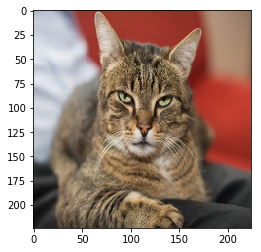

In [5]:
img3 = cv2.imread('../test_images/cat1.jpg')
img3 = preprocess(img3)
predict(net, img3)

Siberian husky
Eskimo dog, husky
malamute, malemute, Alaskan malamute
dingo, warrigal, warragal, Canis dingo
dogsled, dog sled, dog sleigh


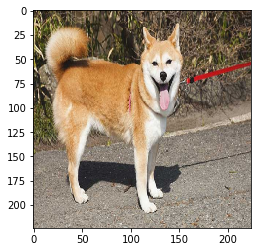

In [6]:
img3 = cv2.imread('../test_images/dog1.jpg')
img3 = preprocess(img3)
predict(net, img3)

stove
file, file cabinet, filing cabinet
chiffonier, commode
washer, automatic washer, washing machine
dishwasher, dish washer, dishwashing machine


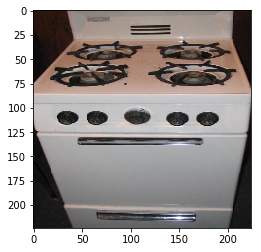

In [7]:
img3 = cv2.imread('../test_images/stove1.jpg')
img3 = preprocess(img3)
predict(net, img3)